# Proyek Analisis Data: PRSA_Data_Tiantan_20130301-20170228.csv dari Air Quality Dataset
- **Nama:** Artientin
- **Email:** artientintien@gmail.com
- **ID Dicoding:** artientin

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi bulan berdasarkan tingkat NO2 pada tahun 2016?
- Berapa persentase hari dengan konsentrasi PM2.5 yang melebihi ambang batas kualitas udara pada tahun 2016?
- Bagaimana Tren tahunan konsentrasi PM2.5 di Tiantan dari tahun 2013 hingga 2017?
- Bagaimana perbedaan SO2 saat hujan dan saat tidak hujan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## Data Wrangling

### Gathering Data

In [ ]:
data = pd.read_csv('/content/PRSA_Data_Tiantan_20130301-20170228.csv')

**Insight:**
- Fungsi read_csv() digunakan untuk membaca file csv.
- File dibaca dengan memasukkan path dari lokasi file tersebut.

### Assessing Data

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [ ]:
print(data.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


**Insight:**
- data.info() memberikan informasi detail terkait data.
- data.head() menampilkan 5 baris teratas dari data.

### Cleaning Data

In [ ]:
data_cleaned = data.dropna()

data_cleaned = data_cleaned.drop(columns=['station', 'wd'])

print(data_cleaned.dtypes)

No         int64
year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
WSPM     float64
dtype: object


In [ ]:
print (pd.DataFrame(data_cleaned))

          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0   
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0   
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0   
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0   
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35055  35056  2017      2   28    15    9.0   9.0  2.0  22.0  300.0  91.0   
35056  35057  2017      2   28    16   10.0  29.0  3.0  21.0  300.0  94.0   
35061  35062  2017      2   28    21   18.0  32.0  4.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   15.0  42.0  5.0  52.0  600.0  44.0   
35063  35064  2017      2   28    23   15.0  50.0  5.0  68.0  700.0  21.0   

       TEMP    PRES  DEWP  RAIN  WSPM  
0      -0.5  1024.5 -21.4   0.0   5

**Insight:**
- Melakukan data cleaning menggunakan dropna() untuk menghapus baris yang memiliki missing value, serta drop() untuk menghapus kolom yang tidak diperlukan.
- Mendeteksi tipe data lalu menampilkan DataFrame yang telah dibersihkan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
data_2016 = data_cleaned[data_cleaned['year'] == 2016]
monthly_NO2 = data_cleaned.groupby('month')['NO2'].mean()

print("Distribusi Bulan Berdasarkan Tingkat NO2: \n")
print(monthly_NO2)

Distribusi Bulan Berdasarkan Tingkat NO2: 

month
1     68.023810
2     52.627514
3     60.468728
4     47.104786
5     40.115979
6     42.121978
7     38.363252
8     39.171866
9     50.949818
10    61.844088
11    62.329326
12    74.275523
Name: NO2, dtype: float64


In [ ]:
data_2016 = data_cleaned[data_cleaned['year'] == 2016]
pm25_threshold = 75

exceeding_days = (data_2016.groupby(['year', 'month', 'day'])['PM2.5'].mean() > pm25_threshold).value_counts()


print("Persentase Hari yang Melebihi Ambang Batas PM2.5 pada tahun 2016: \n")
print(exceeding_days)

Persentase Hari yang Melebihi Ambang Batas PM2.5 pada tahun 2016: 

PM2.5
False    234
True     132
Name: count, dtype: int64


In [ ]:
yearly_PM25 = data_cleaned.groupby('year')['PM2.5'].mean()

print("Tren Tahunan Konsentrasi PM2.5 di Tiantan: \n")
print(yearly_PM25)

Tren Tahunan Konsentrasi PM2.5 di Tiantan: 

year
2013    84.297693
2014    86.242809
2015    81.467797
2016    73.914747
2017    94.715679
Name: PM2.5, dtype: float64


In [ ]:
data_cleaned['is_rain'] = data_cleaned['RAIN'] > 0

print(data_cleaned[['RAIN', 'is_rain']].head())

   RAIN  is_rain
0   0.0    False
1   0.0    False
2   0.0    False
3   0.0    False
4   0.0    False


**Insight:**
- Menggunakan method groupby() pada data yang diperlukan untuk mengorganisir data serta menerapkan fungsi agregasi.
- Menghitung jumlah hujan dengan memanfaatkan is_rain

## Visualization & Explanatory Analysis

### Pertanyaan 1:

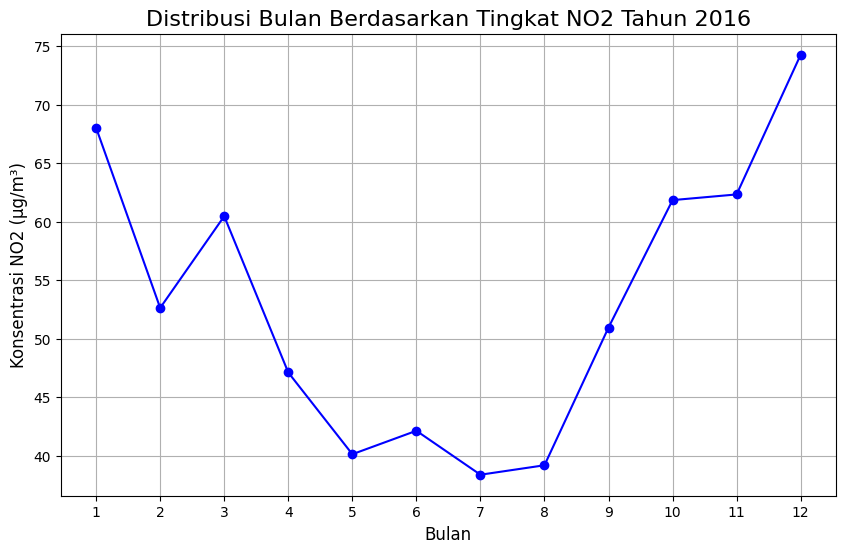

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(monthly_NO2.index, monthly_NO2.values, marker='o', color='b')
plt.title('Distribusi Bulan Berdasarkan Tingkat NO2 Tahun 2016', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konsentrasi NO2 (µg/m³)', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

### Pertanyaan 2:

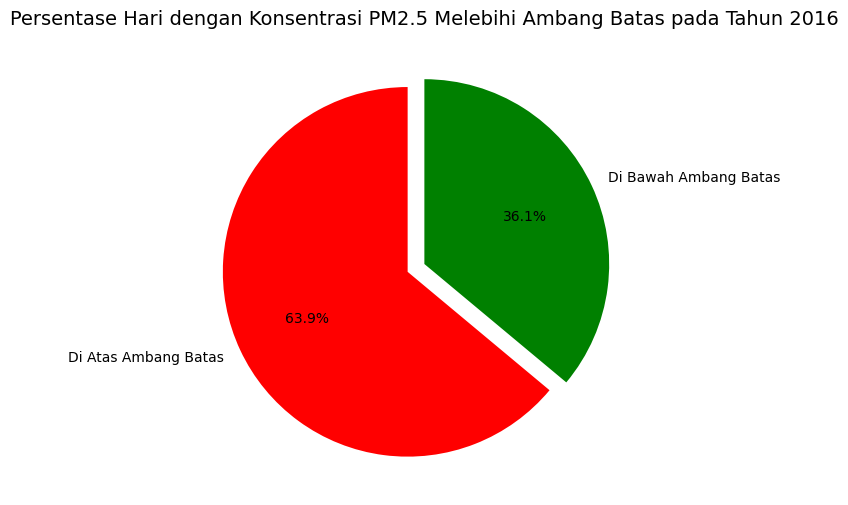

In [ ]:
labels = ['Di Atas Ambang Batas', 'Di Bawah Ambang Batas']
plt.figure(figsize=(6,6))
plt.pie(exceeding_days, labels=labels, autopct='%1.1f%%', colors=['red', 'green'], startangle=90, explode=(0.1, 0))
plt.title('Persentase Hari dengan Konsentrasi PM2.5 Melebihi Ambang Batas pada Tahun 2016', fontsize=14)
plt.show()

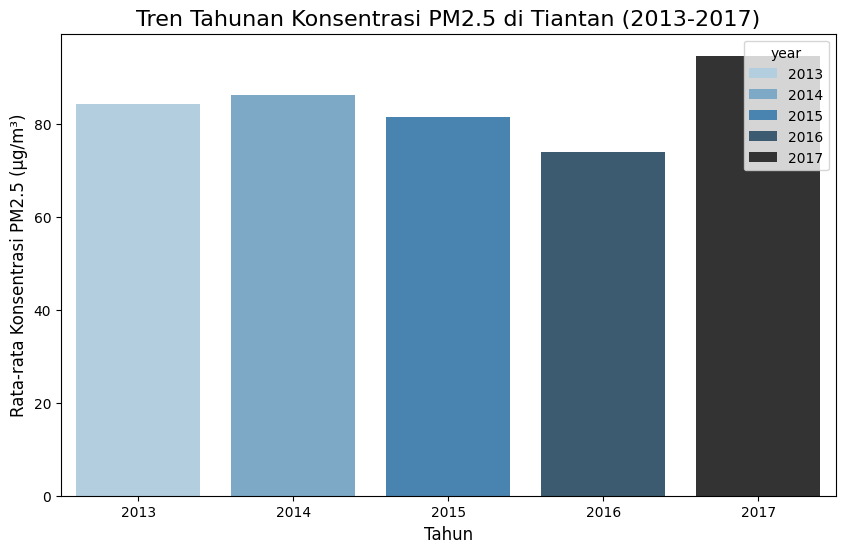

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
sns.barplot(x=yearly_PM25.index, y=yearly_PM25.values, hue=yearly_PM25.index, palette='Blues_d')
plt.title('Tren Tahunan Konsentrasi PM2.5 di Tiantan (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.show()

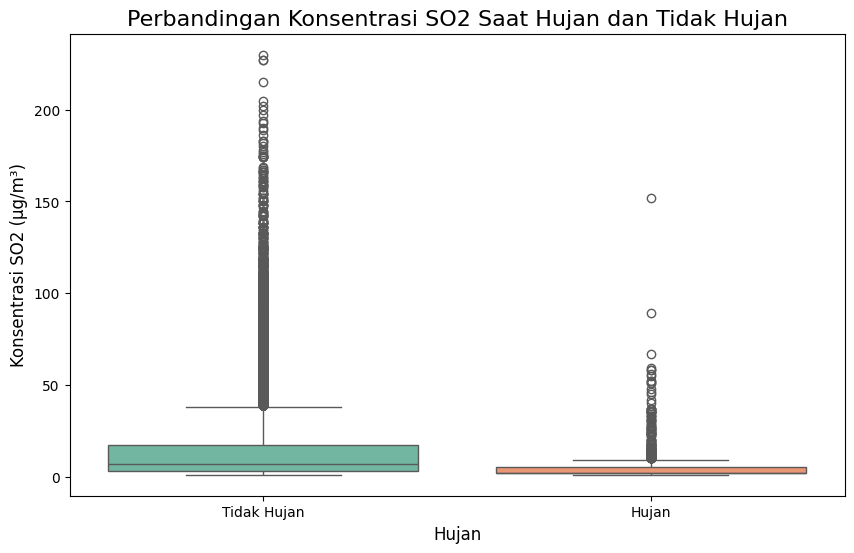

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_rain', y='SO2', data=data_cleaned, palette='Set2')
plt.title('Perbandingan Konsentrasi SO2 Saat Hujan dan Tidak Hujan', fontsize=16)
plt.xlabel('Hujan', fontsize=12)
plt.ylabel('Konsentrasi SO2 (µg/m³)', fontsize=12)
plt.xticks([0, 1], ['Tidak Hujan', 'Hujan'])
plt.show()

**Insight:**
- Menggunakan library seaborn untuk menampilkan visualisasi data.
- Visualisasi data yang ditampilkan yakni Line Chart, Bar Chart, dan Scatter Plot.

## Analisis Lanjutan (Opsional)

In [ ]:
data_cleaned.to_csv("all_data.csv", index=False)

## Conclusion

- Konsentrasi NO2 menunjukkan variasi yang cukup signifikan pada tahun 2016, pada bulan ketiga hingga kelima NO2 mengalami penurunan yang signifikan, lalu mengalami peningkatan yang signifikan di bulan kedelapan hingga bulan kedua belas.
- Pada tahun 2016 terdapat 234 hari dengan konsentrasi PM2.5 berada di  atas ambang batas dan 132 hari lainnya berada di bawah ambang batas, ini menunjukkan bahwa dalam setahun, lebih banyak hari yang memiliki kualitas udara yang relatif buruk dibandingkan hari-hari dengan kualitas udara yang baik.
- Tren tahunan konsentrasi PM2.5 di Tiantan pada tahun 2013 hingga 2017 menunjukkan fluktuasi yang signifikan. Konsentrasi PM2.5 mengalami penurunan dari tahun 2014 hingga 2016, kemudian mengalami peningkatan di tahun 2017.
- Hujan cukup berpengaruh terhadap konsentrasi SO2. Konsentrasi SO2 saat tidak hujan atau dalam keadaan kering cenderung lebih tinggi dibandingkan saat hujan.